In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = '/content/drive/MyDrive/Data Science/DataScienceGroup/Project/challenge_set.json'

In [ ]:
df = pd.read_json(path)

In [ ]:
df.head()

,date,version,playlists,name,description
0,2018-01-16 08:47:28.198015,v1,"{'name': 'spanish playlist', 'num_holdouts': 1...",build/challenge/challenge_set.json,the challenge set for the RecSys Challenge 2018
1,2018-01-16 08:47:28.198015,v1,"{'name': 'Groovin', 'num_holdouts': 48, 'pid':...",build/challenge/challenge_set.json,the challenge set for the RecSys Challenge 2018
2,2018-01-16 08:47:28.198015,v1,"{'name': 'uplift', 'num_holdouts': 40, 'pid': ...",build/challenge/challenge_set.json,the challenge set for the RecSys Challenge 2018
3,2018-01-16 08:47:28.198015,v1,"{'name': 'WUBZ', 'num_holdouts': 27, 'pid': 10...",build/challenge/challenge_set.json,the challenge set for the RecSys Challenge 2018
4,2018-01-16 08:47:28.198015,v1,"{'name': 'new', 'num_holdouts': 41, 'pid': 100...",build/challenge/challenge_set.json,the challenge set for the RecSys Challenge 2018


In [ ]:
import json

In [ ]:
# Normalize the playlists column to extract playlist metadata
playlists_df = pd.json_normalize(df['playlists'])
# playlists_df

# Now we will create a DataFrame for tracks by iterating through each playlist
tracks_list = []
for idx, row in df.iterrows():
    playlist_tracks = row['playlists']['tracks']
    playlist_pid = row['playlists']['pid']

    # Create a dictionary for each track and include the playlist pid
    for track in playlist_tracks:
        track_info = {
            'playlist_pid': playlist_pid,
            **track  # Unpack the track dictionary
        }
        tracks_list.append(track_info)

# Create a DataFrame from the list of tracks
tracks_df = pd.DataFrame(tracks_list)

# Display the resulting DataFrames
print("Playlists DataFrame:")
playlists_df.tail(5)

Playlists DataFrame:


,name,num_holdouts,pid,num_tracks,tracks,num_samples
9995,Playlist 2015,20,1006767,21,"[{'pos': 0, 'artist_name': 'El Gran Combo De P...",1
9996,Workout,24,1006771,25,"[{'pos': 0, 'artist_name': '2Pac', 'track_uri'...",1
9997,Girlz,16,1006773,17,"[{'pos': 0, 'artist_name': 'Ashley DuBose', 't...",1
9998,let's get lost,35,1006775,36,"[{'pos': 0, 'artist_name': 'blackbear', 'track...",1
9999,Mama,28,1006778,29,"[{'pos': 0, 'artist_name': 'Jonas Blue', 'trac...",1


In [ ]:
playlist_tracks

[{'pos': 0,
  'artist_name': 'Jonas Blue',
  'track_uri': 'spotify:track:0NiXXAI876aGImAd6rTj8w',
  'artist_uri': 'spotify:artist:1HBjj22wzbscIZ9sEb5dyf',
  'track_name': 'Mama',
  'album_uri': 'spotify:album:0zMLyv1kNV2B0LDGEK2RbB',
  'duration_ms': 181614,
  'album_name': 'Jonas Blue: Electronic Nature - The Mix 2017'}]

In [ ]:
track_info


{'playlist_pid': 1006778,
 'pos': 0,
 'artist_name': 'Jonas Blue',
 'track_uri': 'spotify:track:0NiXXAI876aGImAd6rTj8w',
 'artist_uri': 'spotify:artist:1HBjj22wzbscIZ9sEb5dyf',
 'track_name': 'Mama',
 'album_uri': 'spotify:album:0zMLyv1kNV2B0LDGEK2RbB',
 'duration_ms': 181614,
 'album_name': 'Jonas Blue: Electronic Nature - The Mix 2017'}

In [ ]:
df = pd.json_normalize(df.playlists[:])

In [ ]:
df.head()

,name,num_holdouts,pid,num_tracks,tracks,num_samples
0,spanish playlist,11,1000002,11,[],0
1,Groovin,48,1000003,48,[],0
2,uplift,40,1000004,40,[],0
3,WUBZ,27,1000006,27,[],0
4,new,41,1000007,41,[],0


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.tracks

,name,num_holdouts,pid,num_tracks,tracks,num_samples
0,spanish playlist,11,1000002,11,[],0
1,Groovin,48,1000003,48,[],0
2,uplift,40,1000004,40,[],0
3,WUBZ,27,1000006,27,[],0
4,new,41,1000007,41,[],0
...,...,...,...,...,...,...
9995,Playlist 2015,20,1006767,21,"[{'pos': 0, 'artist_name': 'El Gran Combo De Puerto Rico', 'track_uri': 'spotify:track:38griAVM808crjbFp9gcPD', 'artist_uri': 'spotify:artist:6nnspeopmJAG07xOxHmqTu', 'track_name': 'Y No Hago Mas Na' - Reggaeton Mix', 'album_uri': 'spotify:album:2QeEEn8jNy5SFx9coIzS3Z', 'duration_ms': 339573, 'album_name': 'Salsa Classics Revisited'}]",1
9996,Workout,24,1006771,25,"[{'pos': 0, 'artist_name': '2Pac', 'track_uri': 'spotify:track:1JClFT74TYSXlzpagbmj0S', 'artist_uri': 'spotify:artist:1ZwdS5xdxEREPySFridCfh', 'track_name': 'California Love - Original Version', 'album_uri': 'spotify:album:3PO9OtQdvCDJN8zDLtZiYd', 'duration_ms': 285026, 'album_name': 'Greatest Hits'}]",1
9997,Girlz,16,1006773,17,"[{'pos': 0, 'artist_name': 'Ashley DuBose', 'track_uri': 'spotify:track:4InLm5a9Qtkru6YxEjM4Qc', 'artist_uri': 'spotify:artist:2Y9lO01ABSO8OkBU8FI1mp', 'track_name': 'Intoxicated', 'album_uri': 'spotify:album:5NjFyeZJkYAh5ri9eh8ZSO', 'duration_ms': 279322, 'album_name': 'Be You'}]",1
9998,let's get lost,35,1006775,36,"[{'pos': 0, 'artist_name': 'blackbear', 'track_uri': 'spotify:track:4hdog9vyyqG9pcppG2Izek', 'artist_uri': 'spotify:artist:2cFrymmkijnjDg9SS92EPM', 'track_name': '90210 (feat. G-Eazy)', 'album_uri': 'spotify:album:1TkwzY3l4LqAfrQwBAx45Q', 'duration_ms': 223295, 'album_name': 'Deadroses'}]",1


In [ ]:
df.tail()

,name,num_holdouts,pid,num_tracks,tracks,num_samples
9995,Playlist 2015,20,1006767,21,"[{'pos': 0, 'artist_name': 'El Gran Combo De Puerto Rico', 'track_uri': 'spotify:track:38griAVM808crjbFp9gcPD', 'artist_uri': 'spotify:artist:6nnspeopmJAG07xOxHmqTu', 'track_name': 'Y No Hago Mas Na' - Reggaeton Mix', 'album_uri': 'spotify:album:2QeEEn8jNy5SFx9coIzS3Z', 'duration_ms': 339573, 'album_name': 'Salsa Classics Revisited'}]",1
9996,Workout,24,1006771,25,"[{'pos': 0, 'artist_name': '2Pac', 'track_uri': 'spotify:track:1JClFT74TYSXlzpagbmj0S', 'artist_uri': 'spotify:artist:1ZwdS5xdxEREPySFridCfh', 'track_name': 'California Love - Original Version', 'album_uri': 'spotify:album:3PO9OtQdvCDJN8zDLtZiYd', 'duration_ms': 285026, 'album_name': 'Greatest Hits'}]",1
9997,Girlz,16,1006773,17,"[{'pos': 0, 'artist_name': 'Ashley DuBose', 'track_uri': 'spotify:track:4InLm5a9Qtkru6YxEjM4Qc', 'artist_uri': 'spotify:artist:2Y9lO01ABSO8OkBU8FI1mp', 'track_name': 'Intoxicated', 'album_uri': 'spotify:album:5NjFyeZJkYAh5ri9eh8ZSO', 'duration_ms': 279322, 'album_name': 'Be You'}]",1
9998,let's get lost,35,1006775,36,"[{'pos': 0, 'artist_name': 'blackbear', 'track_uri': 'spotify:track:4hdog9vyyqG9pcppG2Izek', 'artist_uri': 'spotify:artist:2cFrymmkijnjDg9SS92EPM', 'track_name': '90210 (feat. G-Eazy)', 'album_uri': 'spotify:album:1TkwzY3l4LqAfrQwBAx45Q', 'duration_ms': 223295, 'album_name': 'Deadroses'}]",1
9999,Mama,28,1006778,29,"[{'pos': 0, 'artist_name': 'Jonas Blue', 'track_uri': 'spotify:track:0NiXXAI876aGImAd6rTj8w', 'artist_uri': 'spotify:artist:1HBjj22wzbscIZ9sEb5dyf', 'track_name': 'Mama', 'album_uri': 'spotify:album:0zMLyv1kNV2B0LDGEK2RbB', 'duration_ms': 181614, 'album_name': 'Jonas Blue: Electronic Nature - The Mix 2017'}]",1


In [ ]:
test = df.tracks[:].tail(5)

In [ ]:
test

,tracks
9995,"[{'pos': 0, 'artist_name': 'El Gran Combo De Puerto Rico', 'track_uri': 'spotify:track:38griAVM808crjbFp9gcPD', 'artist_uri': 'spotify:artist:6nnspeopmJAG07xOxHmqTu', 'track_name': 'Y No Hago Mas Na' - Reggaeton Mix', 'album_uri': 'spotify:album:2QeEEn8jNy5SFx9coIzS3Z', 'duration_ms': 339573, 'album_name': 'Salsa Classics Revisited'}]"
9996,"[{'pos': 0, 'artist_name': '2Pac', 'track_uri': 'spotify:track:1JClFT74TYSXlzpagbmj0S', 'artist_uri': 'spotify:artist:1ZwdS5xdxEREPySFridCfh', 'track_name': 'California Love - Original Version', 'album_uri': 'spotify:album:3PO9OtQdvCDJN8zDLtZiYd', 'duration_ms': 285026, 'album_name': 'Greatest Hits'}]"
9997,"[{'pos': 0, 'artist_name': 'Ashley DuBose', 'track_uri': 'spotify:track:4InLm5a9Qtkru6YxEjM4Qc', 'artist_uri': 'spotify:artist:2Y9lO01ABSO8OkBU8FI1mp', 'track_name': 'Intoxicated', 'album_uri': 'spotify:album:5NjFyeZJkYAh5ri9eh8ZSO', 'duration_ms': 279322, 'album_name': 'Be You'}]"
9998,"[{'pos': 0, 'artist_name': 'blackbear', 'track_uri': 'spotify:track:4hdog9vyyqG9pcppG2Izek', 'artist_uri': 'spotify:artist:2cFrymmkijnjDg9SS92EPM', 'track_name': '90210 (feat. G-Eazy)', 'album_uri': 'spotify:album:1TkwzY3l4LqAfrQwBAx45Q', 'duration_ms': 223295, 'album_name': 'Deadroses'}]"
9999,"[{'pos': 0, 'artist_name': 'Jonas Blue', 'track_uri': 'spotify:track:0NiXXAI876aGImAd6rTj8w', 'artist_uri': 'spotify:artist:1HBjj22wzbscIZ9sEb5dyf', 'track_name': 'Mama', 'album_uri': 'spotify:album:0zMLyv1kNV2B0LDGEK2RbB', 'duration_ms': 181614, 'album_name': 'Jonas Blue: Electronic Nature - The Mix 2017'}]"


In [ ]:
pd.json_normalize(test)[0].apply(pd.Series)

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,El Gran Combo De Puerto Rico,spotify:track:38griAVM808crjbFp9gcPD,spotify:artist:6nnspeopmJAG07xOxHmqTu,Y No Hago Mas Na' - Reggaeton Mix,spotify:album:2QeEEn8jNy5SFx9coIzS3Z,339573,Salsa Classics Revisited
1,0,2Pac,spotify:track:1JClFT74TYSXlzpagbmj0S,spotify:artist:1ZwdS5xdxEREPySFridCfh,California Love - Original Version,spotify:album:3PO9OtQdvCDJN8zDLtZiYd,285026,Greatest Hits
2,0,Ashley DuBose,spotify:track:4InLm5a9Qtkru6YxEjM4Qc,spotify:artist:2Y9lO01ABSO8OkBU8FI1mp,Intoxicated,spotify:album:5NjFyeZJkYAh5ri9eh8ZSO,279322,Be You
3,0,blackbear,spotify:track:4hdog9vyyqG9pcppG2Izek,spotify:artist:2cFrymmkijnjDg9SS92EPM,90210 (feat. G-Eazy),spotify:album:1TkwzY3l4LqAfrQwBAx45Q,223295,Deadroses
4,0,Jonas Blue,spotify:track:0NiXXAI876aGImAd6rTj8w,spotify:artist:1HBjj22wzbscIZ9sEb5dyf,Mama,spotify:album:0zMLyv1kNV2B0LDGEK2RbB,181614,Jonas Blue: Electronic Nature - The Mix 2017


In [ ]:
tracks = pd.json_normalize(df.tracks[:])

In [ ]:
test = df.tracks[:].tail(5)

In [ ]:
test

,tracks
9995,"[{'pos': 0, 'artist_name': 'El Gran Combo De Puerto Rico', 'track_uri': 'spotify:track:38griAVM808crjbFp9gcPD', 'artist_uri': 'spotify:artist:6nnspeopmJAG07xOxHmqTu', 'track_name': 'Y No Hago Mas Na' - Reggaeton Mix', 'album_uri': 'spotify:album:2QeEEn8jNy5SFx9coIzS3Z', 'duration_ms': 339573, 'album_name': 'Salsa Classics Revisited'}]"
9996,"[{'pos': 0, 'artist_name': '2Pac', 'track_uri': 'spotify:track:1JClFT74TYSXlzpagbmj0S', 'artist_uri': 'spotify:artist:1ZwdS5xdxEREPySFridCfh', 'track_name': 'California Love - Original Version', 'album_uri': 'spotify:album:3PO9OtQdvCDJN8zDLtZiYd', 'duration_ms': 285026, 'album_name': 'Greatest Hits'}]"
9997,"[{'pos': 0, 'artist_name': 'Ashley DuBose', 'track_uri': 'spotify:track:4InLm5a9Qtkru6YxEjM4Qc', 'artist_uri': 'spotify:artist:2Y9lO01ABSO8OkBU8FI1mp', 'track_name': 'Intoxicated', 'album_uri': 'spotify:album:5NjFyeZJkYAh5ri9eh8ZSO', 'duration_ms': 279322, 'album_name': 'Be You'}]"
9998,"[{'pos': 0, 'artist_name': 'blackbear', 'track_uri': 'spotify:track:4hdog9vyyqG9pcppG2Izek', 'artist_uri': 'spotify:artist:2cFrymmkijnjDg9SS92EPM', 'track_name': '90210 (feat. G-Eazy)', 'album_uri': 'spotify:album:1TkwzY3l4LqAfrQwBAx45Q', 'duration_ms': 223295, 'album_name': 'Deadroses'}]"
9999,"[{'pos': 0, 'artist_name': 'Jonas Blue', 'track_uri': 'spotify:track:0NiXXAI876aGImAd6rTj8w', 'artist_uri': 'spotify:artist:1HBjj22wzbscIZ9sEb5dyf', 'track_name': 'Mama', 'album_uri': 'spotify:album:0zMLyv1kNV2B0LDGEK2RbB', 'duration_ms': 181614, 'album_name': 'Jonas Blue: Electronic Nature - The Mix 2017'}]"


In [ ]:
test[]

In [ ]:
path_csv = '/content/drive/MyDrive/Data Science/DataScienceGroup/Project/spotifyFinalDataset.csv'

In [ ]:
df = pd.read_csv(path_csv)

<ipython-input-27-47c772c2e8ad>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_csv)


In [ ]:
df.head()

,track_pos,track_artist_name,track_track_uri,track_artist_uri,track_track_name,track_album_uri,track_duration_ms,track_album_name,playlist_pid,playlist_name,playlist_description,playlist_modified_at,playlist_num_artists,playlist_num_albums,playlist_num_tracks,playlist_num_followers,playlist_num_edits,playlist_duration_ms,playlist_collaborative
0,0,The Jackson 5,spotify:track:6cb0HzFQPN4BGADOmSzPCw,spotify:artist:2iE18Oxc8YSumAU232n4rW,ABC,spotify:album:4GuzZh2dtsOjG3sMkx52eR,174866,ABC,2000,party party,NaN,1446854400,116,142,152,1,3,39413578,False
1,1,Streetlight Manifesto,spotify:track:0HBvwy7XVhrkQljkCONgsq,spotify:artist:1OKOTYGoCE2buxTYMegJp7,Point/Counterpoint,spotify:album:3phH2ZoACvpLVcPtyIk8jp,327920,Everything Goes Numb,2000,party party,NaN,1446854400,116,142,152,1,3,39413578,False
2,2,Michael Jackson,spotify:track:5ChkMS8OtdzJeqyybCc9R5,spotify:artist:3fMbdgg4jU18AjLCKBhRSm,Billie Jean,spotify:album:1C2h7mLntPSeVYciMRTF4a,293826,Thriller 25 Super Deluxe Edition,2000,party party,NaN,1446854400,116,142,152,1,3,39413578,False
3,3,Green Day,spotify:track:6L89mwZXSOwYl76YXfX13s,spotify:artist:7oPftvlwr6VrsViSDV7fJY,Basket Case,spotify:album:4uG8q3GPuWHQlRbswMIRS6,181533,Dookie,2000,party party,NaN,1446854400,116,142,152,1,3,39413578,False
4,4,The White Stripes,spotify:track:1jNOi6m3Hn8nLEeHCp5Msr,spotify:artist:4F84IBURUo98rz4r61KF70,Seven Nation Army,spotify:album:4teFaDSeFHYXZjZJaZGrAO,231800,Elephant,2000,party party,NaN,1446854400,116,142,152,1,3,39413578,False


In [ ]:
df.shape

(10091445, 19)

In [ ]:
df[~df.playlist_description.isna()]

,track_pos,track_artist_name,track_track_uri,track_artist_uri,track_track_name,track_album_uri,track_duration_ms,track_album_name,playlist_pid,playlist_name,playlist_description,playlist_modified_at,playlist_num_artists,playlist_num_albums,playlist_num_tracks,playlist_num_followers,playlist_num_edits,playlist_duration_ms,playlist_collaborative
588,0,Billie Eilish,spotify:track:2toP38V9z9qPYhX6i48JRH,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,idontwannabeyouanymore,spotify:album:07WV4Vf6503k6K1yGNWG8X,203569,dont smile at me,2008,go to :(,just songs i fall asleep to and or songs i lis...,1509062400,62,68,82,14,57,19881409,False
589,1,The 1975,spotify:track:4GjRDgb77p27GQnbZpv1OJ,spotify:artist:3mIj9lX2MWuHmhNCA7LSCW,Me,spotify:album:0mkOUedmYlOzCC4tOm2v0c,275021,The 1975,2008,go to :(,just songs i fall asleep to and or songs i lis...,1509062400,62,68,82,14,57,19881409,False
590,2,The Lumineers,spotify:track:5OFcjrC1OiRSBylQgF5HDD,spotify:artist:16oZKvXb6WkQlVAjwo2Wbg,Slow It Down,spotify:album:0nRgsLe1she16l3pclpyy7,307000,The Lumineers,2008,go to :(,just songs i fall asleep to and or songs i lis...,1509062400,62,68,82,14,57,19881409,False
591,3,Ryan Adams,spotify:track:25XC8y5LVUvCVtqvrCyLE9,spotify:artist:2qc41rNTtdLK0tV3mJn2Pm,The Shadowlands,spotify:album:5wdCpyp1of35zA4yDmuOJK,318586,Love Is Hell Part 1,2008,go to :(,just songs i fall asleep to and or songs i lis...,1509062400,62,68,82,14,57,19881409,False
592,4,Ben Abraham,spotify:track:1Nh9uvVIhpBVp1iNP6RzOz,spotify:artist:3FfbgiZhcCkoiI7IzOwXlI,A Quiet Prayer,spotify:album:2pSqpiXhrhZbouToXY2wGt,282440,Sirens,2008,go to :(,just songs i fall asleep to and or songs i lis...,1509062400,62,68,82,14,57,19881409,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10085788,62,Hillsong Worship,spotify:track:4KLj9QjEhJl2WU50mxRF9Z,spotify:artist:3SgHzT552wy2W8pNLaLk24,What A Beautiful Name,spotify:album:7m2VtB9IdKJ0WZmnuSB5Q2,238200,What A Beautiful Name,146921,Jesus,Worship,1496448000,35,57,67,2,25,18977037,False
10085789,63,All Sons & Daughters,spotify:track:23aRQxzv8AbUOAV4czlNmp,spotify:artist:44LPOpECjnIlnwH91wo2ir,All the Poor and Powerless,spotify:album:4vSGmXFf0i2RVYAj03pKha,342893,Brokenness Aside EP No. 1,146921,Jesus,Worship,1496448000,35,57,67,2,25,18977037,False
10085790,64,Kristene Dimarco,spotify:track:5t0izTLPeWYLiIfHPJbORJ,spotify:artist:0uWNGisbRTdz6E5O3V3Sc8,It Is Well (Live),spotify:album:6wuUosaTZizPH4t085tNVg,385053,You Make Me Brave (Live),146921,Jesus,Worship,1496448000,35,57,67,2,25,18977037,False
10085791,65,Elevation Worship,spotify:track:562a45H0hU2BkFcT0KDbse,spotify:artist:3YCKuqpv9nCsIhJ2v8SMix,Do it Again (Acoustic),spotify:album:5sbjJuC7SFAkTUCiQ8YbRB,273293,There Is a Cloud,146921,Jesus,Worship,1496448000,35,57,67,2,25,18977037,False


In [ ]:
df.playlist_name.value_counts()

,count
playlist_name,
Country,201455
country,100419
Chill,94626
chill,73149
Rap,71943
...,...
BRASILEIRO,5
all time favorites,5
dis,5


In [ ]:
df.playlist_name.str.lower().value_counts()

,count
playlist_name,
country,309047
chill,172204
rap,111627
workout,89468
oldies,78247
...,...
10s,5
azul,5
champeta,5


In [ ]:
x = df.playlist_name.str.lower().str.replace(' ', '').value_counts().reset_index()

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17592 entries, 0 to 17591
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   playlist_name  17592 non-null  object
 1   count          17592 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 275.0+ KB


In [ ]:
x[x.count => 5000]

SyntaxError: invalid syntax (<ipython-input-45-da5aacdd65c8>, line 1)

In [ ]:
x[x['count'] > 5000]

,playlist_name,count
0,country,347606
1,chill,184499
2,rap,116464
3,workout,110573
4,oldies,85363
...,...,...
222,october,5174
223,latin,5100
224,bumpin,5084
225,studying,5075


In [ ]:
df.columns

Index(['track_pos', 'track_artist_name', 'track_track_uri', 'track_artist_uri',
       'track_track_name', 'track_album_uri', 'track_duration_ms',
       'track_album_name', 'playlist_pid', 'playlist_name',
       'playlist_description', 'playlist_modified_at', 'playlist_num_artists',
       'playlist_num_albums', 'playlist_num_tracks', 'playlist_num_followers',
       'playlist_num_edits', 'playlist_duration_ms', 'playlist_collaborative'],
      dtype='object')

In [ ]:
"import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.groupby('playlist_name')['playlist_num_followers'].sum()

,playlist_num_followers
playlist_name,
ok,40
Mix,67
My best,9
bluegrass,100
chill,35
...,...
🤷🏽‍♀️:)),28
🥀🥀,283
🦄🦄,311


In [ ]:
df[df["playlist_name"] =='ok']

,track_pos,track_artist_name,track_track_uri,track_artist_uri,track_track_name,track_album_uri,track_duration_ms,track_album_name,playlist_pid,playlist_name,playlist_description,playlist_modified_at,playlist_num_artists,playlist_num_albums,playlist_num_tracks,playlist_num_followers,playlist_num_edits,playlist_duration_ms,playlist_collaborative
559015,0,Tev Woods,spotify:track:0YuLjgPEbTjREhBnvpf8qT,spotify:artist:7xj9jAZZmVd3zdWIrTEjSx,Acid Love,spotify:album:3jo6oMDAaI9mibJUUb22dM,216000,Acid Love,3332,ok,NaN,1508803200,29,33,35,1,10,7775837,False
559016,1,GTA,spotify:track:10hFslvFmtAfmEUhcCHyE3,spotify:artist:6M7RdR9ZP52h2mfNLmiHtU,True Romance (feat. Jarina De Marco),spotify:album:7D7gToSUwjOPdnpNdQHCKd,256546,Good Times Ahead,3332,ok,NaN,1508803200,29,33,35,1,10,7775837,False
559017,2,San Holo,spotify:track:7zTx8ePYAmPFQuxP3xlXZn,spotify:artist:0jNDKefhfSbLR9sFvcPLHo,Light,spotify:album:1ryx7dR65CbJgeJys4gFiL,239853,Light (Remixes) - EP,3332,ok,NaN,1508803200,29,33,35,1,10,7775837,False
559018,3,Flume,spotify:track:5GmpXxQblFKLt74paopo0W,spotify:artist:6nxWCVXbOlEVRexSbLsTer,Trust,spotify:album:3vGceDwU6yB3JKbvtru8lm,197132,Skin Companion EP I,3332,ok,NaN,1508803200,29,33,35,1,10,7775837,False
559019,4,Jai Wolf,spotify:track:1mia2jUSO5ea1Pe7xmsLV0,spotify:artist:24V5UY0nChKpnb1TBPJhCw,Indian Summer,spotify:album:3qoMadqfValFjOdwKh9TsL,248480,Indian Summer,3332,ok,NaN,1508803200,29,33,35,1,10,7775837,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829358,14,A$AP Ferg,spotify:track:6YVbCxw3Yqyj4dRomrXPhl,spotify:artist:5dHt1vcEm9qb8fCyLcB3HL,Rubber Band Man,spotify:album:0tQ7Iu6EicQTPyhYRNWjaT,205746,Still Striving,149046,ok,NaN,1509062400,13,17,19,1,7,3979503,False
9829359,15,Kendrick Lamar,spotify:track:5DO1SazQppcsKQ1c1JpyQz,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,Hol' Up,spotify:album:13WjgUEEAQp0d9JqojlWp1,173158,Section.80,149046,ok,NaN,1509062400,13,17,19,1,7,3979503,False
9829360,16,Kendrick Lamar,spotify:track:3iVcZ5G6tvkXZkZKlMpIUs,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,Alright,spotify:album:7ycBtnsMtyVbbwTfJwRjSP,219333,To Pimp A Butterfly,149046,ok,NaN,1509062400,13,17,19,1,7,3979503,False
9829361,17,Kendrick Lamar,spotify:track:4KjnaUNYPwGnJjoeTFlt91,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,Now Or Never - Bonus Track,spotify:album:3DGQ1iZ9XKUQxAUWjfC34w,256013,"good kid, m.A.A.d city",149046,ok,NaN,1509062400,13,17,19,1,7,3979503,False


In [ ]:
df.playlist_num_followers.value_counts()

,count
playlist_num_followers,
1,7001143
2,1740574
3,621273
4,276139
5,141913
...,...
243,13
285,12
867,10


In [ ]:
df.playlist_num_followers.describe()

,playlist_num_followers
count,1.009144e+07
mean,3.083279e+00
std,9.095108e+01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,1.584200e+04


<Axes: >

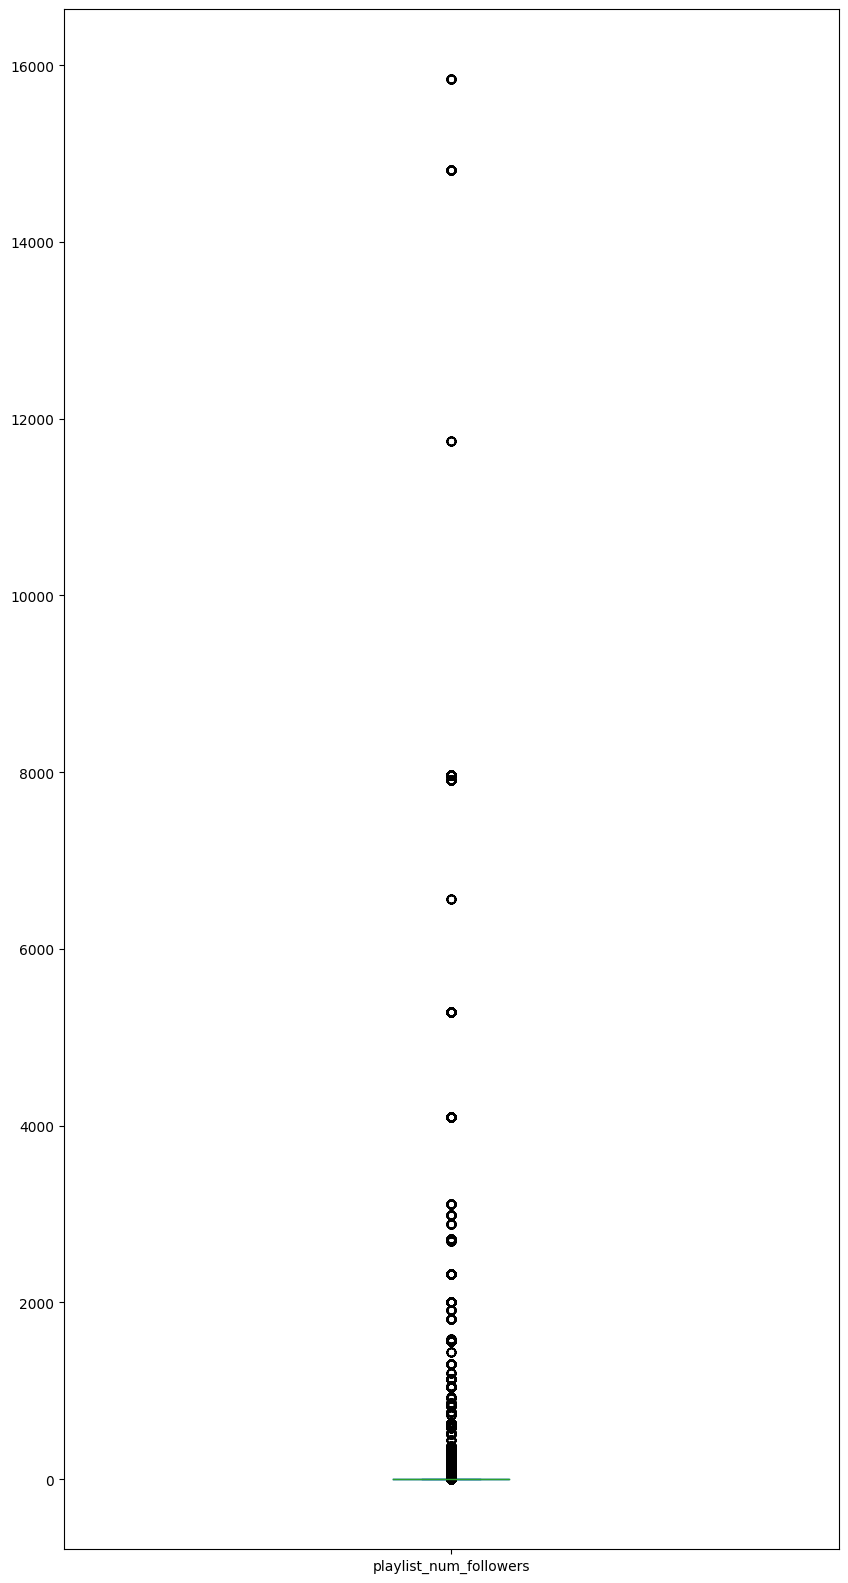

In [ ]:
plt.figure(figsize=(10, 20))

df.playlist_num_followers.plot(kind='box', y = 'playlist_num_followers')

In [ ]:
df[df.playlist_num_followers > 1000].playlist_name.unique()

array(['Now Playing', 'Tangled', 'TOP POP', 'in the clouds', 'raggaeton',
       'Wiz Khalifa', 'Cute Songs', 'Summer 16', 'Pop Country',
       'AWOLNATION', 'Classic R&B', 'feels...', 'girl power',
       'kids music ', 'Makeout', 'FRANCO DE VITA', 'Stoner rock',
       'GETTING READY', 'Lil Pump', 'chill', 'Workout Playlist ',
       'wedding playlist ', 'Inspiration', 'BYE', 'Positive Vibes',
       'BOY BYE', 'Hipster International  ', 'J cole'], dtype=object)

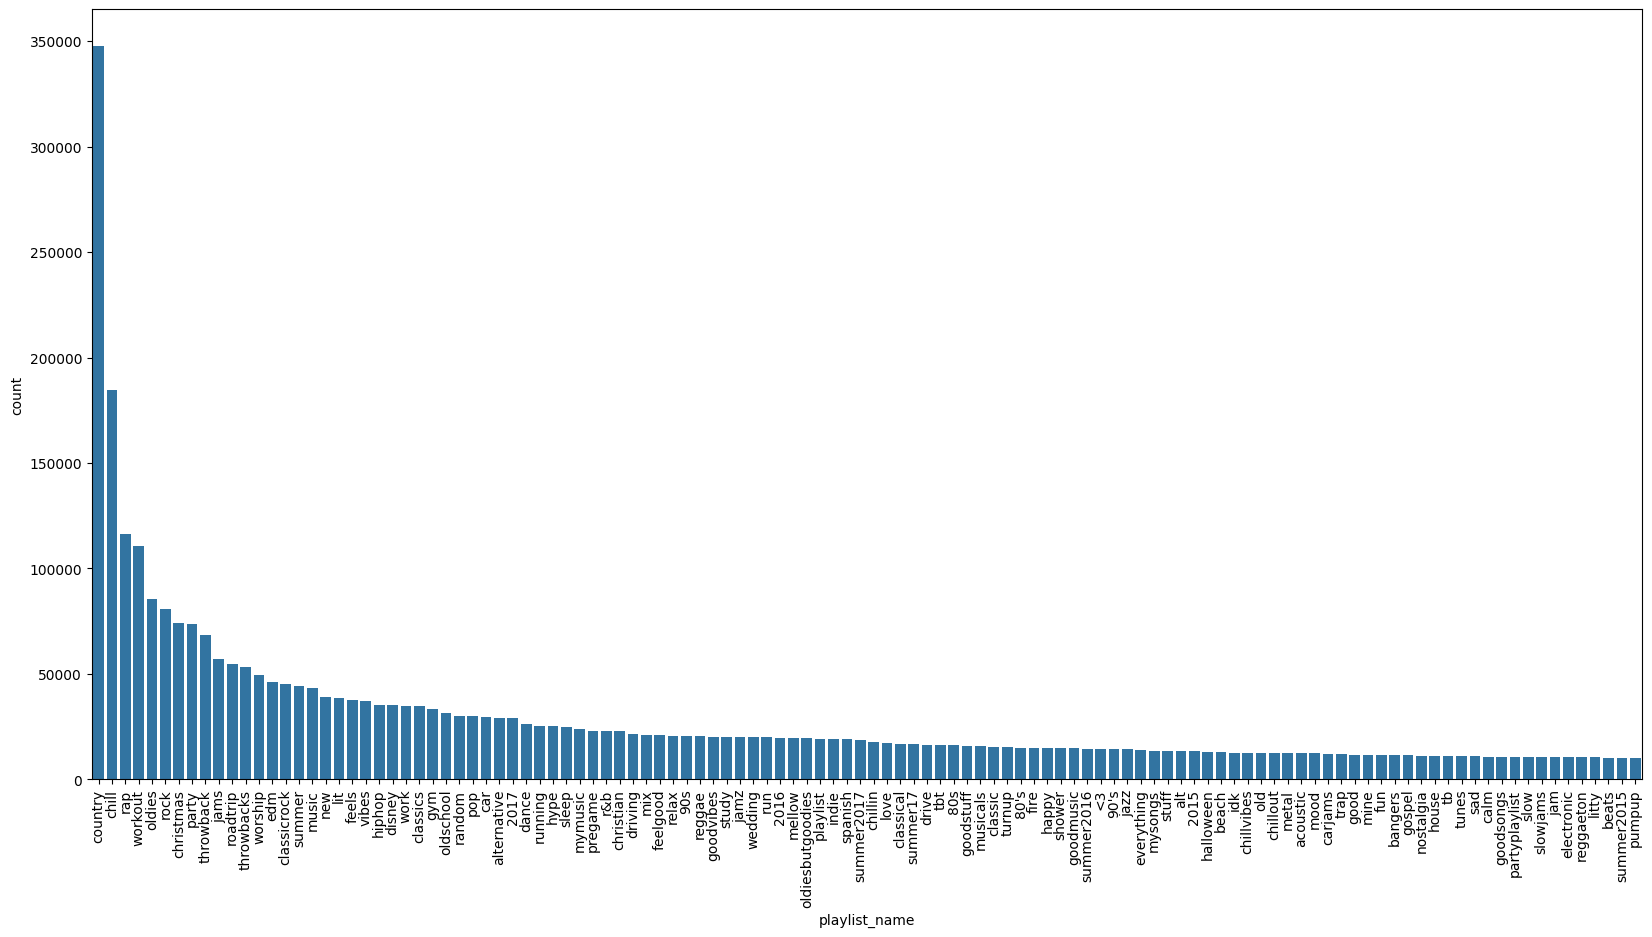

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(data= x[x['count'] > 10000], x = 'playlist_name', y = 'count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
x[x['count'] > 10000]['playlist_name'].plot(kind=)

TypeError: no numeric data to plot

In [ ]:
import nltk

In [ ]:
help(nltk)

Help on package nltk:

NAME
    nltk

DESCRIPTION
    The Natural Language Toolkit (NLTK) is an open source Python library
    for Natural Language Processing.  A free online book is available.
    (If you use the library for academic research, please cite the book.)
    
    Steven Bird, Ewan Klein, and Edward Loper (2009).
    Natural Language Processing with Python.  O'Reilly Media Inc.
    https://www.nltk.org/book/
    
    isort:skip_file
    
    @version: 3.8.1

PACKAGE CONTENTS
    app (package)
    book
    ccg (package)
    chat (package)
    chunk (package)
    classify (package)
    cli
    cluster (package)
    collections
    collocations
    compat
    corpus (package)
    data
    decorators
    downloader
    draw (package)
    featstruct
    grammar
    help
    inference (package)
    internals
    jsontags
    langnames
    lazyimport
    lm (package)
    metrics (package)
    misc (package)
    parse (package)
    probability
    sem (package)
    sentiment (packa